# Individual experiments

**Imports**

In [1]:
# Navigate to appropriate directory
import os
while os.path.split(os.getcwd())[1] != "patchmatch":
    os.chdir("..")
    if os.getcwd() == "/":
        raise ValueError()

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time
from tqdm import tqdm

import patchmatch as pm
import postprocessing as pp

**Matplotlib display mode**

In [2]:
# Run this cell to display matplotlib plots in a separate window
# %matplotlib qt

In [3]:
# Run this cell to display matplotlib plots inside the jupyter notebook
# %matplotlib inline

In the following sections, we test the PatchMatch algorithm on 2 different images with copy-move forgery: one with a simple translation and one with a translation and a rotation.

## Some functions

In [4]:
def plot_vect_field(pm_, mask, step=100, **kwargs):
    """
    Plot vect_field as arrows above the image
    
    Parameters
    ----------
    pm_ : instance of PatchMatch
    mask : array-like, shape (m, n)
        only vectors whose "roots" are on pixels for wich mask is non-zero will be plotted
    step : int
        step between two plotted vectors
    **kwargs : keyword arguments
        keyword arguments to be passed to plt.arrow (e.g. head_width, head_length, ...)
    """
    default_kwargs = {"width": 1e-3, "head_width": 1, "head_length": 1.5, "length_includes_head": True}
    default_kwargs.update(kwargs)
    default_kwargs["head_length"] = 1.5 * default_kwargs["head_width"]
    plt.imshow(pm_.im.astype("uint8"))
    for i in range(0, pm_.m, step):  # for each pixel in the mask
        for j in range(0, pm_.n, step):
            if mask[i, j] > 0:
                plt.arrow(j, i, *pm_.vect_field[i, j, ::-1], **default_kwargs)
    plt.axis("off")

## Image 1: Antibes

### Load image 

In [5]:
im = Image.open("data/CMFD_DB/TP_C02_007_copy.png")
im = np.array(im).astype("double")
gt = Image.open("data/CMFD_DB/TP_C02_007_gt.png")
gt = np.array(gt) > 0

### Initialize Patchmatch

Expected runtime with init_method=1 and zernike=True (p=10, max_zrd=6): 54s   
Expected runtime with init_method=2 and zernike=True (p=10, max_zrd=6): 55s   
Expected runtime with init_method=1 and zernike=False (p=10, max_zrd=6): 5s   
Expected runtime with init_method=2 and zernike=False (p=10, max_zrd=6): 5s   

In [6]:
t0 = time()
a = pm.PatchMatch(
    im,  # image
    p=10,  # patch half-size
    max_zrd=6,  # maximum Zernike degree
    min_dn=64,   # minimum displacement norm (previously T)
    n_rs_candidates=5,   # number of candidates in the random search phase (previously L)
    init_method=2,  # whether to use create_vect_field1 or create_vect_field2
    zernike=True  # whether to use Zernike moments
)
t1 = time()
print(t1 - t0)

75.2344708442688


### Displacement field before running PatchMatch

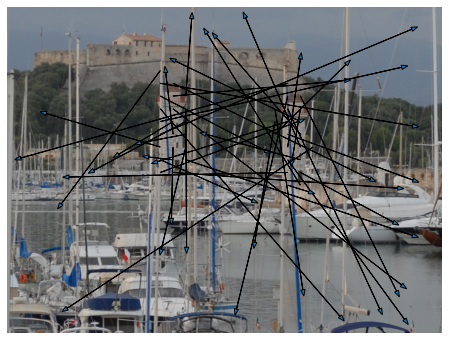

In [7]:
plt.figure(figsize=(16,6))
plot_vect_field(a, gt, step=30, head_width=10)
# plt.xlim([330, 710])
# plt.ylim([450, 125])
plt.savefig("figures/antibes_arrows_before_patchmatch.png", bbox_inches="tight", dpi=100)
plt.show()

### Run PatchMatch

Expected running time with zernike=True (max_zrd=6): <10s for each iteration (1 iteration = 2 scans)

In [8]:
t0 = time()
a.run(5)
t1 = time()
print(t1 - t0)

39.44961476325989


### Plot results

In [9]:
plt.rcParams.update({'font.size': 22})

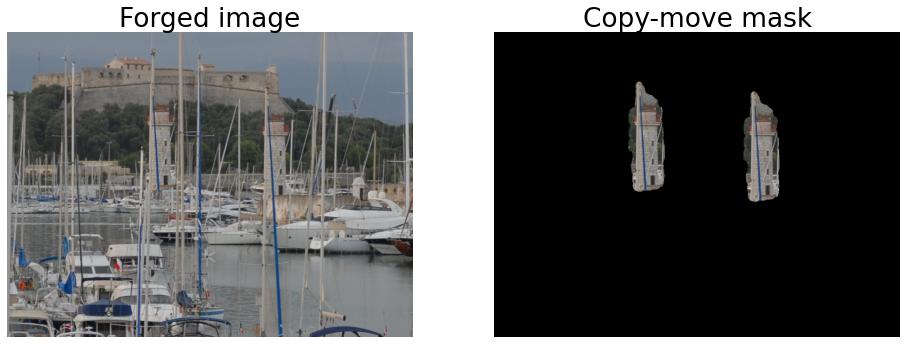

In [10]:
# Plot original image
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].imshow(im.astype("uint8"))
ax[0].axis("off")
ax[0].set_title("Forged image")
ax[1].imshow(im.astype("uint8") * gt[..., np.newaxis])
ax[1].axis("off")
ax[1].set_title("Copy-move mask")
plt.savefig("figures/antibes.png",bbox_inches='tight',dpi=100)
plt.show()

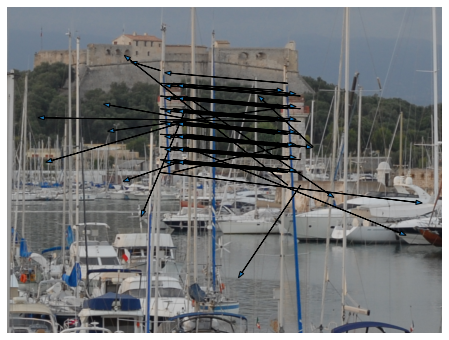

In [11]:
plt.figure(figsize=(16,6))
plot_vect_field(a, gt, step=30, head_width=10)
# plt.xlim([330, 710])
# plt.ylim([450, 125])
plt.savefig("figures/antibes_arrows_after_patchmatch", bbox_inches="tight", dpi=100)
plt.show()

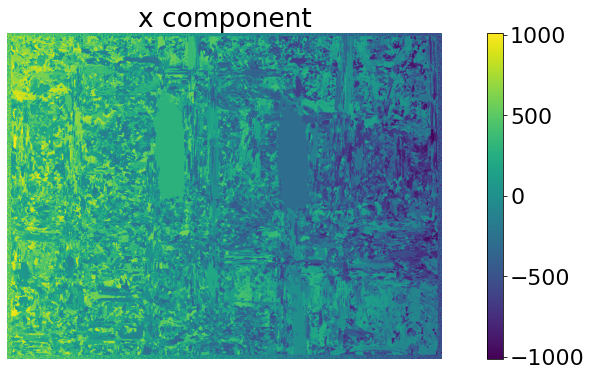

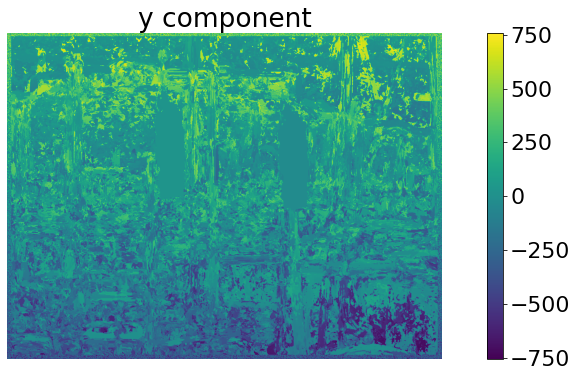

In [12]:
# x component
plt.figure(figsize=(16,6))
plt.title('x component')
plt.imshow(a.vect_field[..., 1]) #, vmin=0, vmax=60)
plt.colorbar()
plt.axis("off")
plt.savefig("figures/antibes_x_component.png",bbox_inches='tight',dpi=100)
plt.show()
# y component
plt.figure(figsize=(16,6))
plt.title('y component')
plt.imshow(a.vect_field[..., 0]) #, vmin=0, vmax=60)
plt.colorbar()
plt.axis("off")
plt.savefig("figures/antibes_y_component.png",bbox_inches='tight',dpi=100)
plt.show()

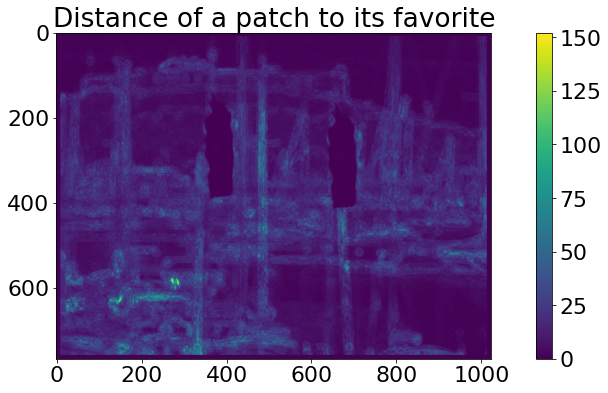

In [13]:
plt.figure(figsize=(16,6))
plt.title("Distance of a patch to its favorite")
plt.imshow(a.dist_field)
plt.colorbar()
plt.show()

In [14]:
mask = pp.compute_mask_1(a.vect_field, a.m, a.n, a.p)

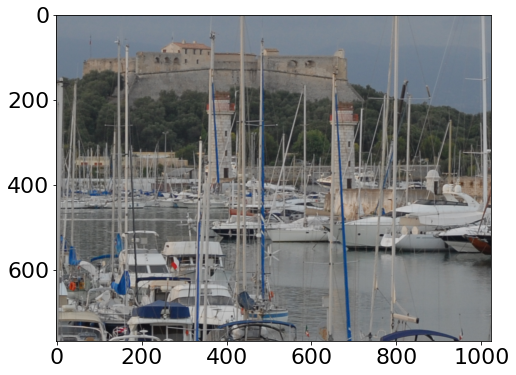

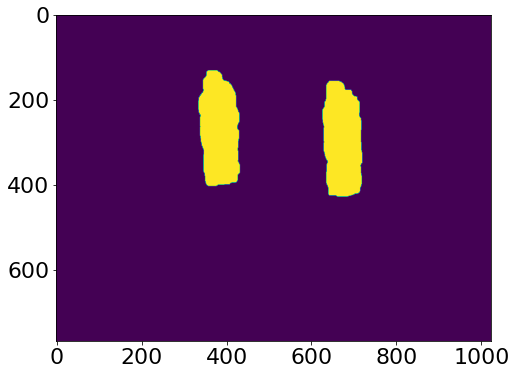

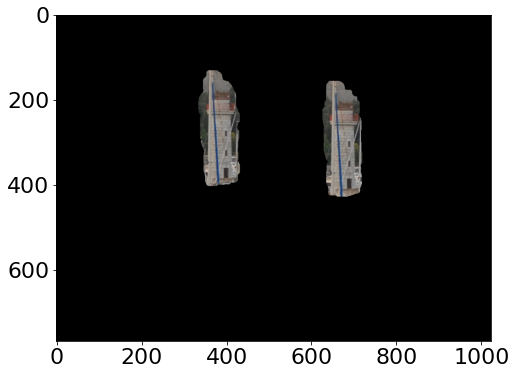

In [15]:
plt.figure(figsize=(16,6))
plt.imshow(im.astype("uint8"))
plt.show()

plt.figure(figsize=(16,6))
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,6))
plt.imshow((mask[:,:,None]*im).astype("uint8"))
plt.show()

## Image 2: Flowers

### Load image 

In [16]:
im2 = Image.open("data/CMFD_CODE/TP_C01_039_copy_r45.png")
im2 = np.array(im2).astype("double")
gt2 = Image.open("data/CMFD_CODE/TP_C01_039_gt_r45.png")
gt2 = np.array(gt2) > 0

### Initialize Patchmatch

In [17]:
t0 = time()
a2 = pm.PatchMatch(
    im2,  # image
    p=10,  # patch half-size
    max_zrd=6,  # maximum Zernike degree
    min_dn=64,   # minimum displacement norm (previously T)
    n_rs_candidates=5,   # number of candidates in the random search phase (previously L)
    init_method=2,  # whether to use create_vect_field1 or create_vect_field2
    zernike=True  # whether to use Zernike moments
)
t1 = time()
print(t1 - t0)

56.271299600601196


### Run PatchMatch

In [18]:
t0 = time()
a2.run(5)
t1 = time()
print(t1 - t0)

33.80978775024414


### Plot results

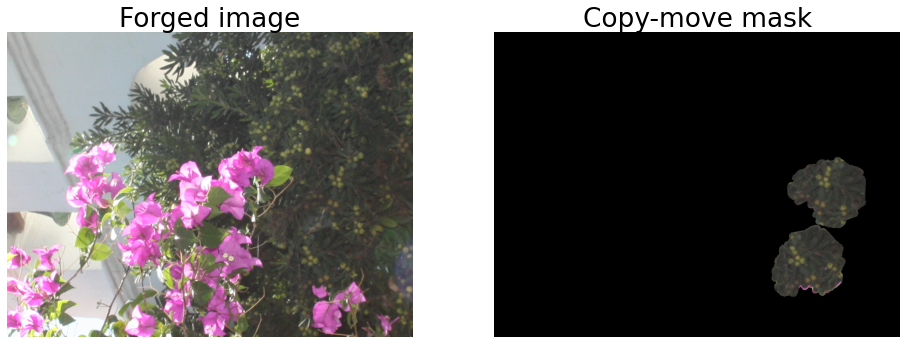

In [19]:
# Plot original image
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].imshow(im2.astype("uint8"))
ax[0].axis("off")
ax[0].set_title("Forged image")
ax[1].imshow(im2.astype("uint8") * gt2[..., np.newaxis])
ax[1].axis("off")
ax[1].set_title("Copy-move mask")
plt.savefig("figures/flowers.png",bbox_inches='tight',dpi=100)
plt.show()

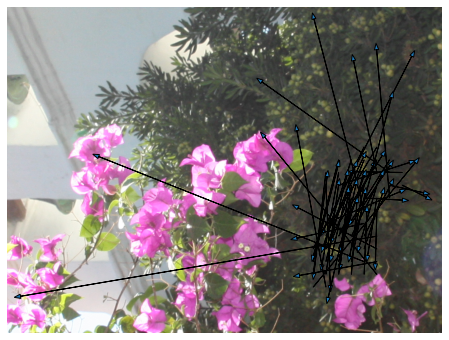

In [20]:
plt.figure(figsize=(16,6))
plot_vect_field(a2, gt2, step=30, head_width=10)
# plt.xlim([600, 1000])
# plt.ylim([700, 250])
plt.savefig("figures/flowers_arrows_rgb_features.png",bbox_inches='tight',dpi=100)
plt.show()

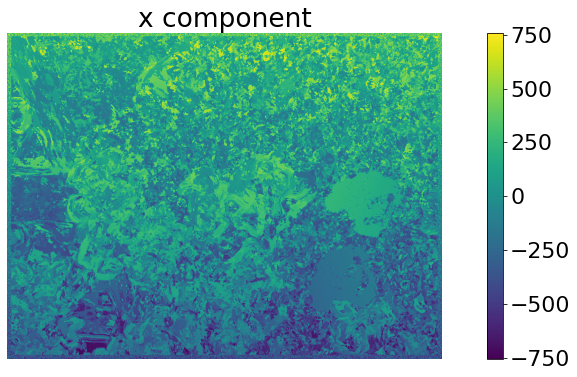

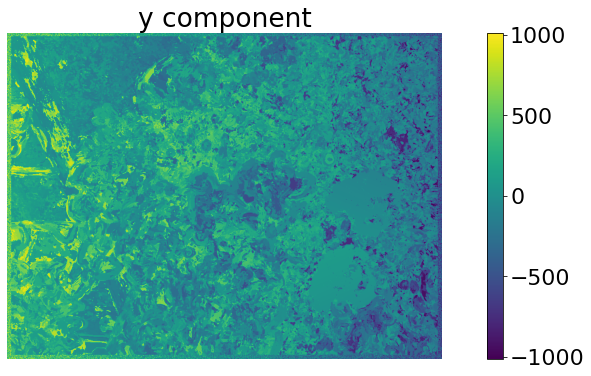

In [21]:
# x component
plt.figure(figsize=(16,6))
plt.title('x component')
plt.imshow(a2.vect_field[..., 0]) #, vmin=0, vmax=60)
plt.colorbar()
plt.axis("off")
plt.savefig("figures/flowers_x_component.png",bbox_inches='tight',dpi=100)
plt.show()
# y component
plt.figure(figsize=(16,6))
plt.title('y component')
plt.imshow(a2.vect_field[..., 1]) #, vmin=0, vmax=60)
plt.colorbar()
plt.axis("off")
plt.savefig("figures/flowers_y_component.png",bbox_inches='tight',dpi=100)
plt.show()

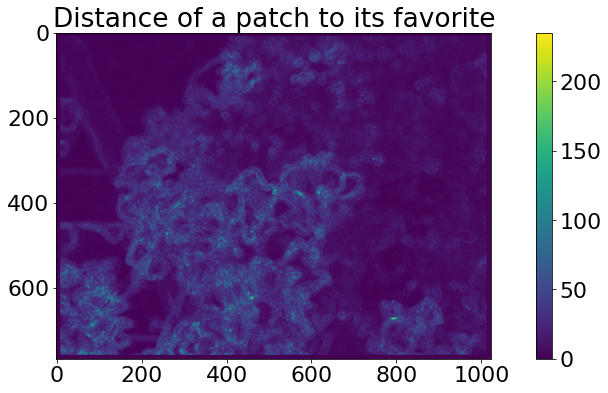

In [22]:
plt.figure(figsize=(16,6))
plt.title("Distance of a patch to its favorite")
plt.imshow(a2.dist_field)
plt.colorbar()
plt.show()

In [23]:
mask2 = pp.compute_mask_1(a2.vect_field, a2.m, a2.n, a2.p)

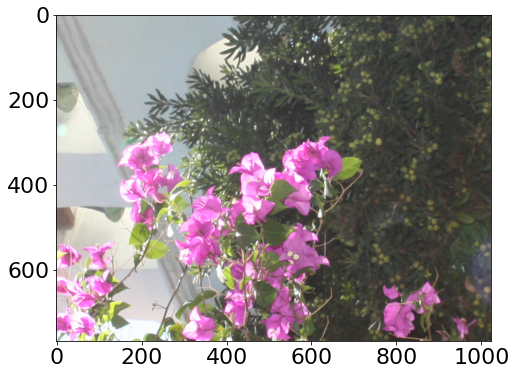

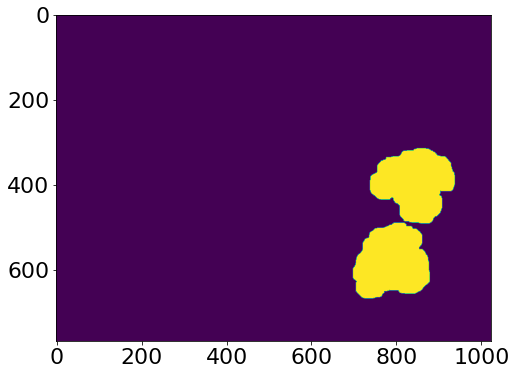

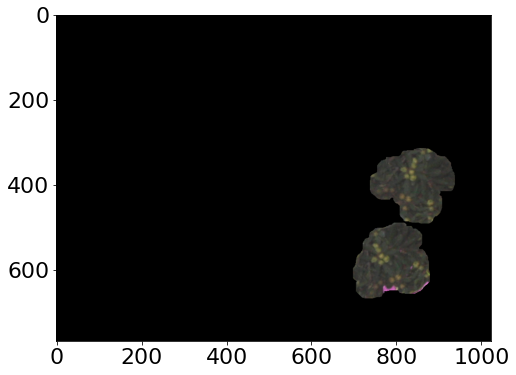

In [24]:
plt.figure(figsize=(16,6))
plt.imshow(im2.astype("uint8"))
plt.show()

plt.figure(figsize=(16,6))
plt.imshow(mask2)
plt.show()

plt.figure(figsize=(16,6))
plt.imshow((mask2[:,:,None]*im2).astype("uint8"))
plt.show()

## Image 3: Leaf

In [25]:
im3 = Image.open("data/own/feuille_copy.png")
im3 = np.array(im3).astype("double")

In [26]:
t0 = time()
a3 = pm.PatchMatch(
    im3,  # image
    p=10,  # patch half-size
    max_zrd=6,  # maximum Zernike degree
    min_dn=64,   # minimum displacement norm (previously T)
    n_rs_candidates=5,   # number of candidates in the random search phase (previously L)
    init_method=2,  # whether to use create_vect_field1 or create_vect_field2
    zernike=True  # whether to use Zernike moments
)
t1 = time()
print(t1 - t0)

3.7786591053009033


In [27]:
t0 = time()
a3.run(5)
t1 = time()
print(t1 - t0)

1.6524531841278076


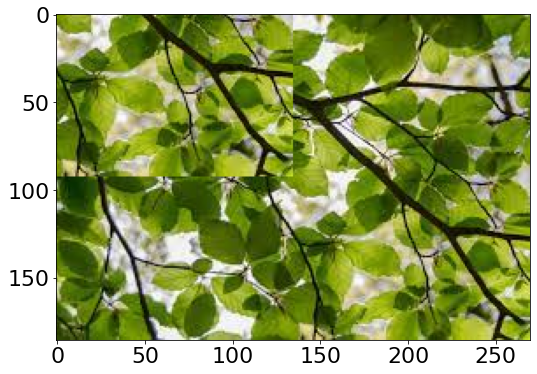

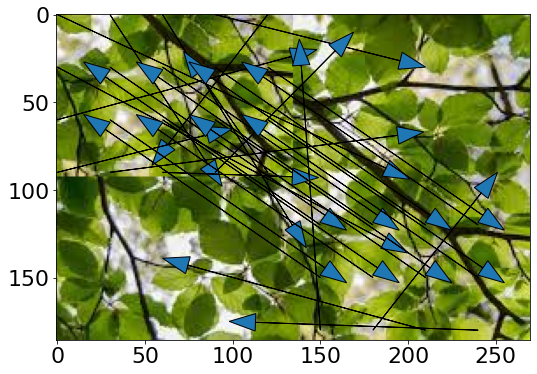

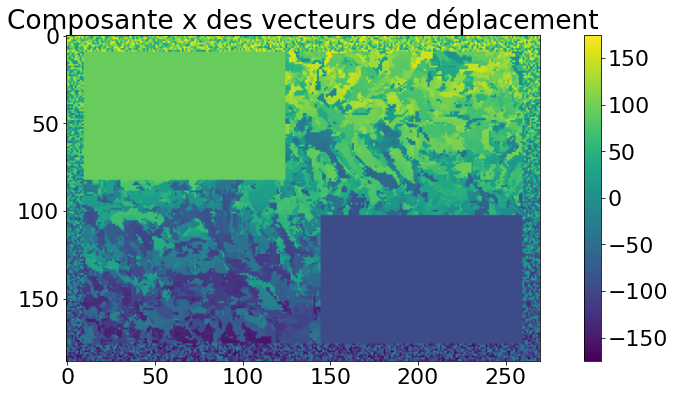

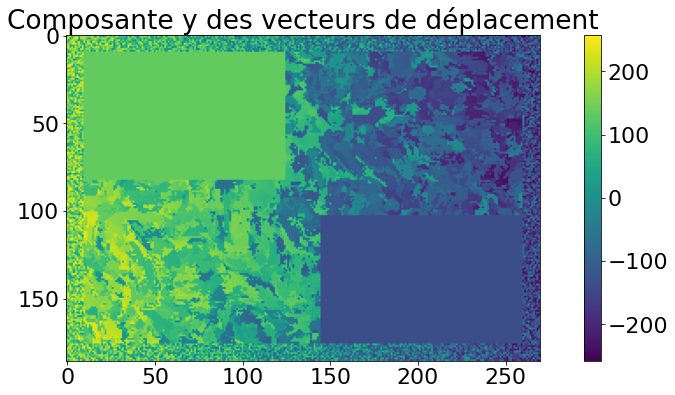

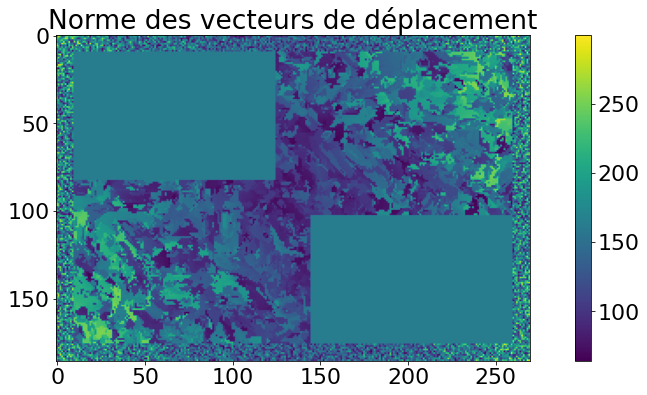

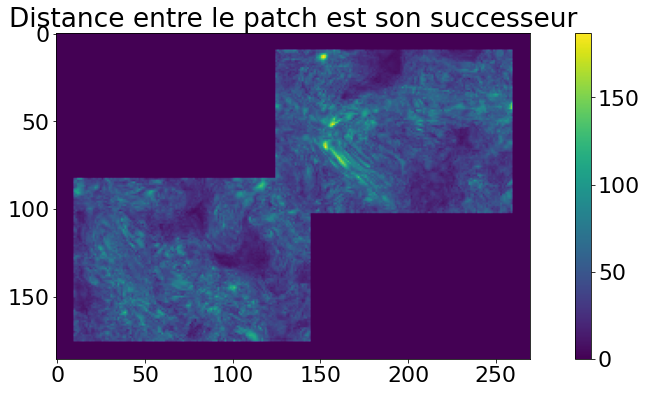

In [28]:
plt.figure(figsize=(16,6))
plt.imshow(im3.astype("uint8"))
plt.show()

gt3 = np.zeros((a3.m, a3.n))
gt3[:a3.m//2, :a3.n//2] = np.ones((a3.m//2,a3.n//2))
gt3[a3.m//2:, a3.n//2:] = np.ones((a3.m//2,a3.n//2))
plt.figure(figsize=(16,6))
pm.plot_vect_field(a3, gt3, step=30, head_width=10)
plt.show()

plt.figure(figsize=(16,6))
plt.title('Composante x des vecteurs de déplacement')
plt.imshow(a3.vect_field[..., 0]) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,6))
plt.title('Composante y des vecteurs de déplacement')
plt.imshow(a3.vect_field[..., 1]) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,6))
plt.title('Norme des vecteurs de déplacement')
plt.imshow(np.sqrt(a3.vect_field[..., 0]**2 + a3.vect_field[..., 1]**2)) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()

plt.figure(figsize=(16,6))
plt.title('Distance entre le patch est son successeur')
plt.imshow(a3.dist_field)
plt.colorbar()
plt.show()

In [29]:
mask3 = pp.compute_mask_1(a3.vect_field, a3.m, a3.n, a3.p)

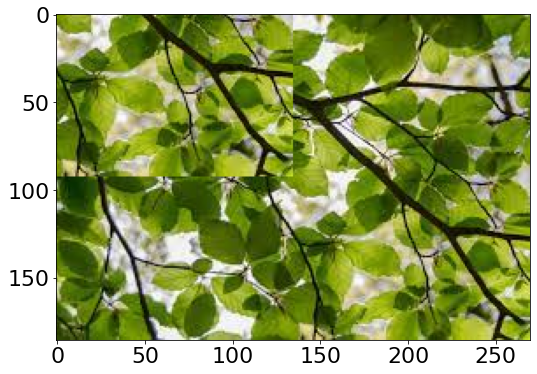

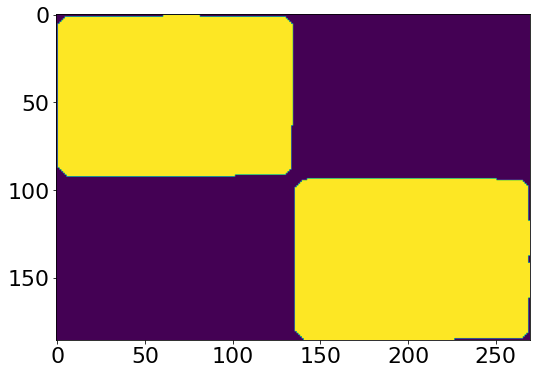

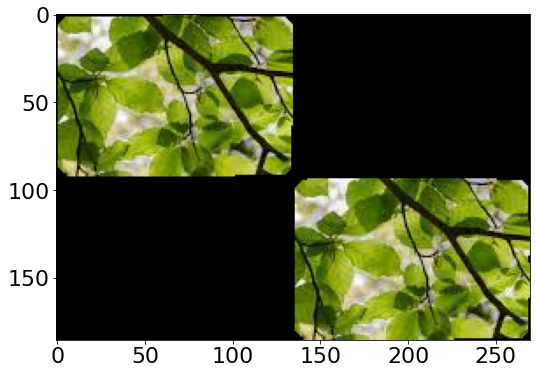

In [30]:
plt.figure(figsize=(16,6))
plt.imshow(im3.astype("uint8"))
plt.show()

plt.figure(figsize=(16,6))
plt.imshow(mask3)
plt.show()

plt.figure(figsize=(16,6))
plt.imshow((mask3[:,:,None] * im3).astype("uint8"))
plt.show()